# Back Propagation Neural Network

> BP using libraries - December 2024
>
> NEC First Assignment - Universitat Rovira i Virgili
>
> *Andrea Pujals Bocero*

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
#read the csv data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [43]:
#print the training and testing sets shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 9) (8000, 1)
(2000, 9) (2000, 1)


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the model with an Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly specify the input shape
    Dense(8, activation="sigmoid"),     # Hidden layer 1
    Dense(4, activation="sigmoid"),      # Hidden layer 2
    Dense(1)                          # Output layer
])

# Uncomment the optimizer to use

# SGD Optimizer
#sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.8)
#model.compile(optimizer=sgd, loss="mse", metrics=["mae", "mape"])

# Adam Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=adam, loss="mse", metrics=["mae", "mape"])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100, 
    verbose=2    # Show progress per epoch
)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse, mae, mape = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse:.4f}, Test MAE: {mae:.4f}, Test MAPE: {mape:.2f}%")

Epoch 1/100
250/250 - 1s - 4ms/step - loss: 0.0141 - mae: 0.0764 - mape: 4084.0637 - val_loss: 0.0061 - val_mae: 0.0494 - val_mape: 40.2112
Epoch 2/100
250/250 - 0s - 1ms/step - loss: 0.0033 - mae: 0.0383 - mape: 1288.0265 - val_loss: 0.0037 - val_mae: 0.0458 - val_mape: 64.9808
Epoch 3/100
250/250 - 0s - 1ms/step - loss: 0.0031 - mae: 0.0375 - mape: 1696.8512 - val_loss: 0.0017 - val_mae: 0.0270 - val_mape: 30.3433
Epoch 4/100
250/250 - 0s - 1ms/step - loss: 0.0030 - mae: 0.0369 - mape: 2748.8337 - val_loss: 0.0019 - val_mae: 0.0300 - val_mape: 23.4433
Epoch 5/100
250/250 - 0s - 1ms/step - loss: 0.0031 - mae: 0.0371 - mape: 6610.1484 - val_loss: 0.0059 - val_mae: 0.0565 - val_mape: 64.6265
Epoch 6/100
250/250 - 1s - 2ms/step - loss: 0.0030 - mae: 0.0377 - mape: 9391.0244 - val_loss: 0.0034 - val_mae: 0.0388 - val_mape: 35.8507
Epoch 7/100
250/250 - 0s - 1ms/step - loss: 0.0026 - mae: 0.0349 - mape: 4839.2148 - val_loss: 0.0062 - val_mae: 0.0605 - val_mape: 74.5870
Epoch 8/100
250/250 

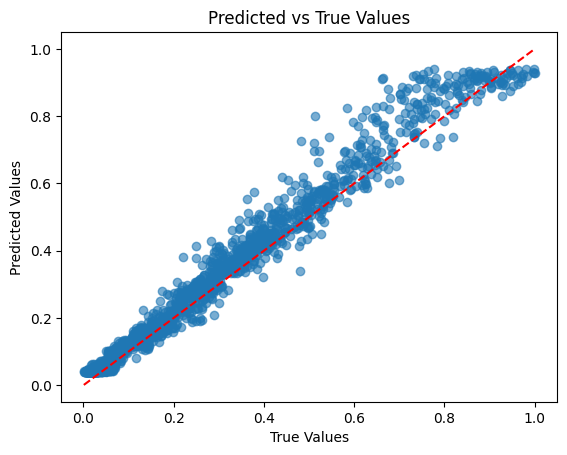

In [45]:
# Visualize predictions
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Values")
plt.show()
